In [2]:
path1=r'C:\Users\Ramesh Kumar\Jupter Home\INeuron\Machine Learning\End to End projects\Creditcard_default_prediction\creditcard\artifact\data_ingestion\19-07-2022_22-25-36\ingested_data\train\creditcard.csv'

In [3]:
path2=r'C:\Users\Ramesh Kumar\Jupter Home\INeuron\Machine Learning\End to End projects\Creditcard_default_prediction\creditcard\artifact\data_ingestion\19-07-2022_22-25-36\ingested_data\test\creditcard.csv'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train_df = pd.read_csv(path1)

In [6]:
test_df = pd.read_csv(path2)

In [7]:
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,26297,360000.0,2,3,2,29,-1,-1,-1,-1,...,3255.0,8255.0,8411.0,5005.0,4851.0,4784.0,5000.0,3000.0,2000.0,0
1,634,210000.0,2,2,1,47,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2864,50000.0,1,2,1,37,0,0,0,0,...,17926.0,18487.0,19029.0,1579.0,1590.0,1000.0,1000.0,1000.0,1200.0,0
3,12375,20000.0,2,2,2,39,4,3,2,0,...,11240.0,11476.0,11708.0,0.0,420.0,402.0,417.0,423.0,1472.0,1
4,4328,180000.0,1,2,1,35,-1,-1,-1,-1,...,1099.0,0.0,1099.0,1099.0,1099.0,1099.0,0.0,1099.0,0.0,0


In [8]:
train_df.rename(columns={'default.payment.next.month':'default_payment_next_month'},inplace=True)

In [9]:
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,26297,360000.0,2,3,2,29,-1,-1,-1,-1,...,3255.0,8255.0,8411.0,5005.0,4851.0,4784.0,5000.0,3000.0,2000.0,0
1,634,210000.0,2,2,1,47,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2864,50000.0,1,2,1,37,0,0,0,0,...,17926.0,18487.0,19029.0,1579.0,1590.0,1000.0,1000.0,1000.0,1200.0,0
3,12375,20000.0,2,2,2,39,4,3,2,0,...,11240.0,11476.0,11708.0,0.0,420.0,402.0,417.0,423.0,1472.0,1
4,4328,180000.0,1,2,1,35,-1,-1,-1,-1,...,1099.0,0.0,1099.0,1099.0,1099.0,1099.0,0.0,1099.0,0.0,0


In [10]:
train_df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

In [11]:
train_df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default_payment_next_month      int64
dtype: object

In [12]:
total_features = list(train_df.columns)

In [13]:
total_features.remove('default_payment_next_month')

In [14]:
total_features.remove('ID')

In [15]:
total_features

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [16]:
descrete_features = [feature for feature in total_features if len(train_df[feature].unique())<25]

In [17]:
descrete_features

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [18]:
continuos_features = [feature for feature in total_features if feature not in descrete_features]

In [19]:
continuos_features

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [20]:
train_df[descrete_features].head()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,3,2,-1,-1,-1,-1,0,0
1,2,2,1,-2,-2,-2,-2,-2,-2
2,1,2,1,0,0,0,0,0,0
3,2,2,2,4,3,2,0,0,0
4,1,2,1,-1,-1,-1,-1,-1,-1


In [21]:
train_df[continuos_features].head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,360000.0,29,4887.0,4982.0,4851.0,3255.0,8255.0,8411.0,5005.0,4851.0,4784.0,5000.0,3000.0,2000.0
1,210000.0,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50000.0,37,15175.0,16505.0,17516.0,17926.0,18487.0,19029.0,1579.0,1590.0,1000.0,1000.0,1000.0,1200.0
3,20000.0,39,11553.0,11081.0,11021.0,11240.0,11476.0,11708.0,0.0,420.0,402.0,417.0,423.0,1472.0
4,180000.0,35,1099.0,1099.0,1099.0,1099.0,0.0,1099.0,1099.0,1099.0,1099.0,0.0,1099.0,0.0


Lets find the relationship between descrete_features and output feature

<AxesSubplot:xlabel='SEX'>

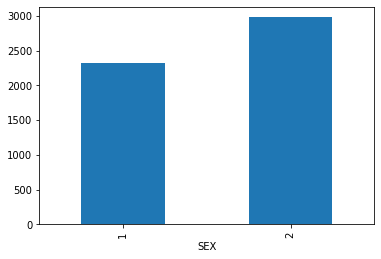

In [22]:
train_df.groupby('SEX')['default_payment_next_month'].sum().plot.bar()

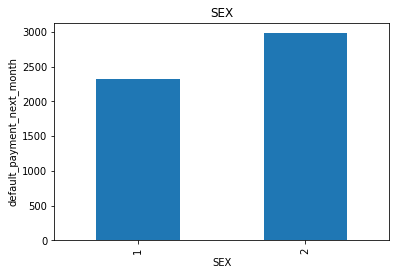

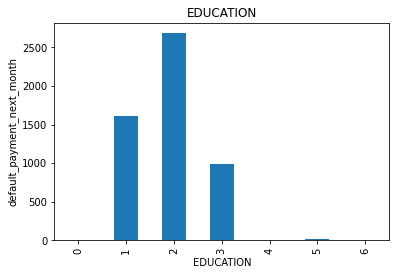

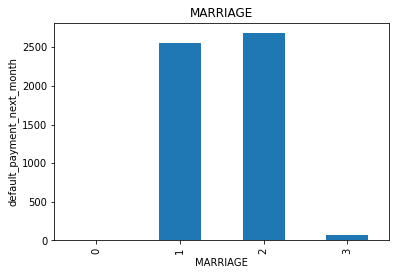

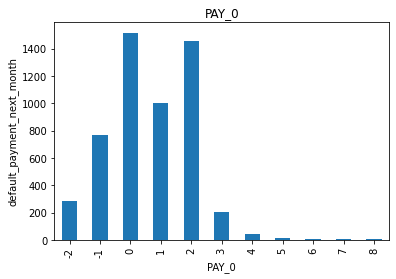

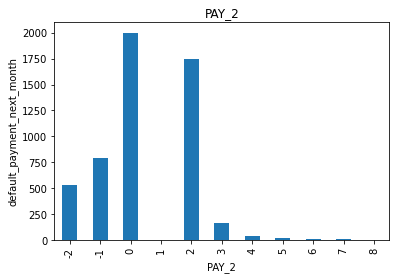

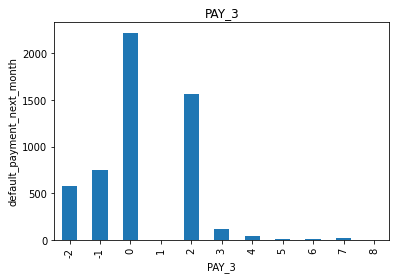

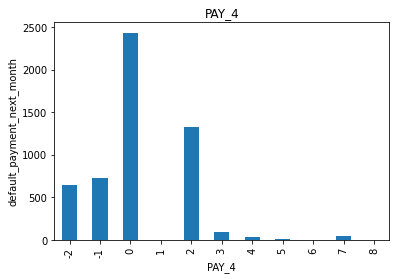

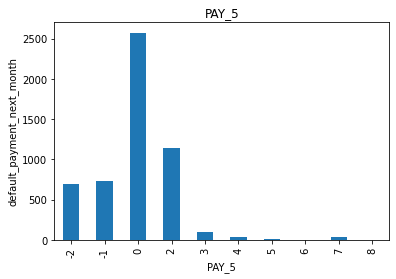

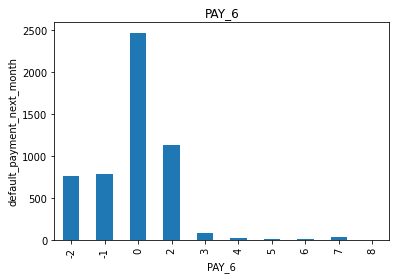

In [24]:
for feature in descrete_features:
    train = train_df.copy()
    train_df.groupby(feature)['default_payment_next_month'].sum().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('default_payment_next_month')
    plt.title(feature)
    plt.show()

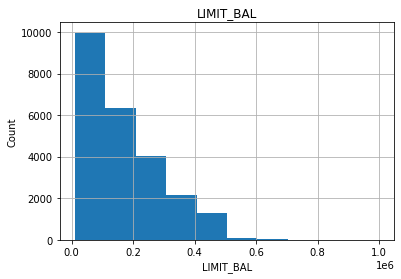

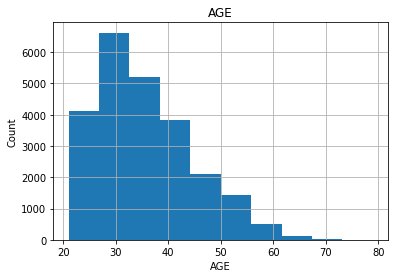

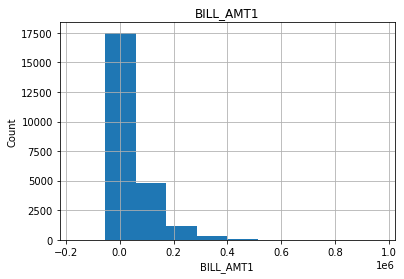

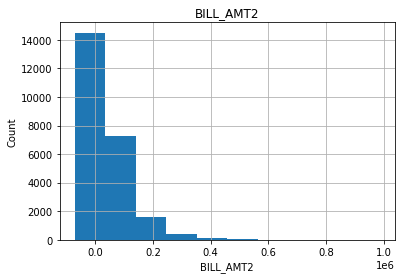

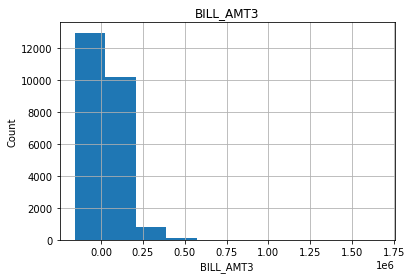

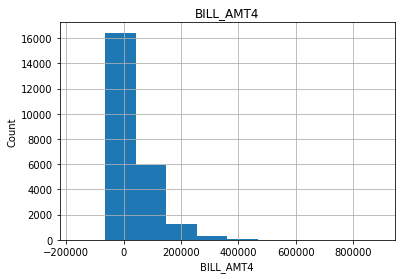

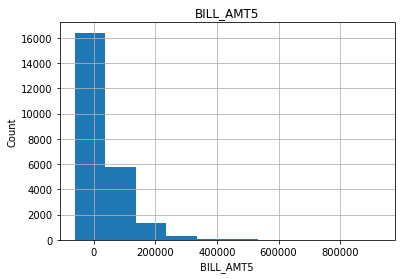

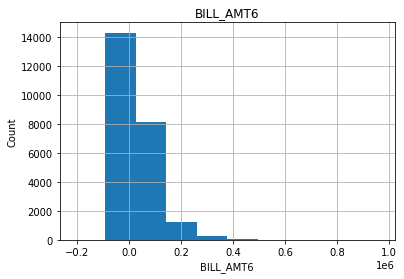

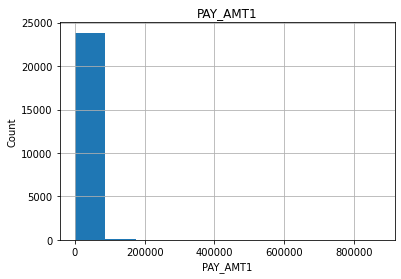

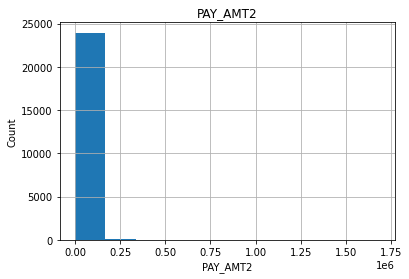

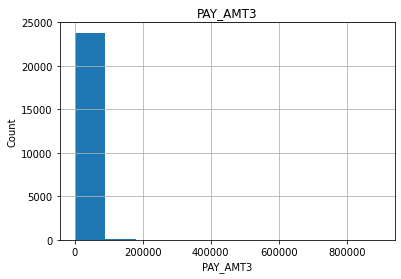

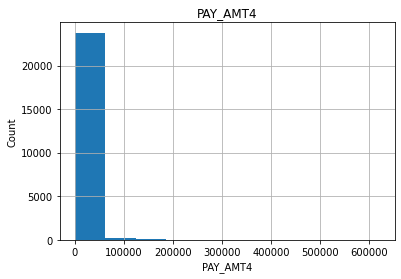

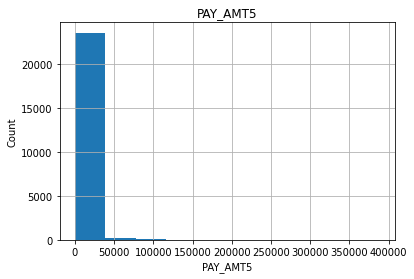

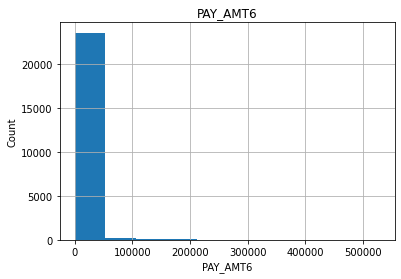

In [29]:
for feature in continuos_features:
    train = train_df.copy()
    train_df[feature].hist(bins=10)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Outliers